# NARX GP Grid Search

In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, Product

from scipy.sparse import csr_matrix

from data import load_narx_data, load_data
from util_fun import calculate_error_nrms, use_NARX_model_in_simulation, plot_NRMS_Pred_vs_Sim

In [2]:
# Initialize stationary parameters

Split = [0.6, 0.2, 0.2] # split; [training, validation, test]
total_number_of_points = 5000 # total number of points to consider from the larger dataset (starting from index 0)

na_list=[*range(2,11)]
nb_list=[*range(2,6)]
restarts = 5

val_pred_NRMSs=np.ndarray((len(na_list),len(nb_list)))
val_sim_NRMSs=np.ndarray((len(na_list),len(nb_list)))
test_pred_NRMSs=np.ndarray((len(na_list),len(nb_list)))
test_sim_NRMSs=np.ndarray((len(na_list),len(nb_list)))

## Define your kernel here

In [3]:
kernel = RBF() + WhiteKernel()
reg = GaussianProcessRegressor(kernel, n_restarts_optimizer=restarts)

In [4]:
#Load normal data
Xtrain,Ytrain = load_data(section="train", split=Split, total_number_of_points=total_number_of_points, as_tensor=False)
Xval,Yval = load_data(section="validation", split=Split, total_number_of_points=total_number_of_points, as_tensor=False)
Xtest,Ytest = load_data(section="test", split=Split, total_number_of_points=total_number_of_points, as_tensor=False)

Using 3000 datapoints for training set


In [5]:
for i, n_a in enumerate(na_list):
    for j, n_b in enumerate(nb_list):
        
        print(f"Currently running: na= {n_a}, nb= {n_b}")
        
        #Construct NARX data
        Xtrain_NARX,Ytrain_NARX = load_narx_data(n_a, n_b, total_number_of_points, section="train", split=Split, as_tensor=False)
        Xval_NARX,Yval_NARX = load_narx_data(n_a, n_b, total_number_of_points, section="validation", split=Split, as_tensor=False)
        Xtest_NARX,Ytest_NARX = load_narx_data(n_a, n_b, total_number_of_points, section="test", split=Split, as_tensor=False)
        

        #Convert to sparce matrices
        XtrainSparse = csr_matrix(Xtrain_NARX).toarray()
        YtrainSparse = csr_matrix(Ytrain_NARX).toarray().transpose()

        #Fit the GP
        reg.fit(XtrainSparse, YtrainSparse)
        
        #Initialize parameters for simulation
        fmodel = lambda u,y: reg.predict(np.concatenate([u,y])[None,:])[0] 
        
        #Prediction on validation set
        Yval_pred, Yval_pred_std = reg.predict(Xval_NARX,return_std=True)
        
        #Simulation on validation set
        Yval_sim = use_NARX_model_in_simulation(Xval, fmodel, n_a, n_b)
        
        #Prediction on test set
        Ytest_pred, Ytest_pred_std = reg.predict(Xtest_NARX,return_std=True)
        
        #Simulation on test set
        Ytest_sim = use_NARX_model_in_simulation(Xtest, fmodel, n_a, n_b)
        
        #Store results
        val_pred_NRMSs[i,j] = calculate_error_nrms(Yval_pred, Yval_NARX)
        val_sim_NRMSs[i,j] = calculate_error_nrms(Yval_sim, Yval)
        test_pred_NRMSs[i,j] = calculate_error_nrms(Ytest_pred, Ytest_NARX)
        test_sim_NRMSs[i,j] = calculate_error_nrms(Ytest_sim, Ytest)

Currently running: na= 2, nb= 2
Using 3000 datapoints for training set
Currently running: na= 2, nb= 3
Using 3000 datapoints for training set
Currently running: na= 2, nb= 4
Using 3000 datapoints for training set
Currently running: na= 2, nb= 5
Using 3000 datapoints for training set
Currently running: na= 3, nb= 2
Using 3000 datapoints for training set
Currently running: na= 3, nb= 3
Using 3000 datapoints for training set
Currently running: na= 3, nb= 4
Using 3000 datapoints for training set
Currently running: na= 3, nb= 5
Using 3000 datapoints for training set
Currently running: na= 4, nb= 2
Using 3000 datapoints for training set


c:\Users\20191695\Anaconda3\envs\ml4sc\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Currently running: na= 4, nb= 3
Using 3000 datapoints for training set


c:\Users\20191695\Anaconda3\envs\ml4sc\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Currently running: na= 4, nb= 4
Using 3000 datapoints for training set
Currently running: na= 4, nb= 5
Using 3000 datapoints for training set


c:\Users\20191695\Anaconda3\envs\ml4sc\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Currently running: na= 5, nb= 2
Using 3000 datapoints for training set


c:\Users\20191695\Anaconda3\envs\ml4sc\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Currently running: na= 5, nb= 3
Using 3000 datapoints for training set
Currently running: na= 5, nb= 4
Using 3000 datapoints for training set


c:\Users\20191695\Anaconda3\envs\ml4sc\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Currently running: na= 5, nb= 5
Using 3000 datapoints for training set
Currently running: na= 6, nb= 2
Using 3000 datapoints for training set
Currently running: na= 6, nb= 3
Using 3000 datapoints for training set
Currently running: na= 6, nb= 4
Using 3000 datapoints for training set
Currently running: na= 6, nb= 5
Using 3000 datapoints for training set


c:\Users\20191695\Anaconda3\envs\ml4sc\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Currently running: na= 7, nb= 2
Using 3000 datapoints for training set


c:\Users\20191695\Anaconda3\envs\ml4sc\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Currently running: na= 7, nb= 3
Using 3000 datapoints for training set
Currently running: na= 7, nb= 4
Using 3000 datapoints for training set
Currently running: na= 7, nb= 5
Using 3000 datapoints for training set
Currently running: na= 8, nb= 2
Using 3000 datapoints for training set
Currently running: na= 8, nb= 3
Using 3000 datapoints for training set


c:\Users\20191695\Anaconda3\envs\ml4sc\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Currently running: na= 8, nb= 4
Using 3000 datapoints for training set


c:\Users\20191695\Anaconda3\envs\ml4sc\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Currently running: na= 8, nb= 5
Using 3000 datapoints for training set


c:\Users\20191695\Anaconda3\envs\ml4sc\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Currently running: na= 9, nb= 2
Using 3000 datapoints for training set
Currently running: na= 9, nb= 3
Using 3000 datapoints for training set
Currently running: na= 9, nb= 4
Using 3000 datapoints for training set
Currently running: na= 9, nb= 5
Using 3000 datapoints for training set
Currently running: na= 10, nb= 2
Using 3000 datapoints for training set


c:\Users\20191695\Anaconda3\envs\ml4sc\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Currently running: na= 10, nb= 3
Using 3000 datapoints for training set
Currently running: na= 10, nb= 4
Using 3000 datapoints for training set


c:\Users\20191695\Anaconda3\envs\ml4sc\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Currently running: na= 10, nb= 5
Using 3000 datapoints for training set


# Validation data

c:\Users\20191695\Desktop\TUe\Master\Year1\Q4\5SC28\5SC28\util_fun.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([0]+na_list)
c:\Users\20191695\Desktop\TUe\Master\Year1\Q4\5SC28\5SC28\util_fun.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([0]+na_list)


Best parameters by prediction NRMS: na= 8, nb= 3
Best parameters by simulation NRMS: na= 8, nb= 3


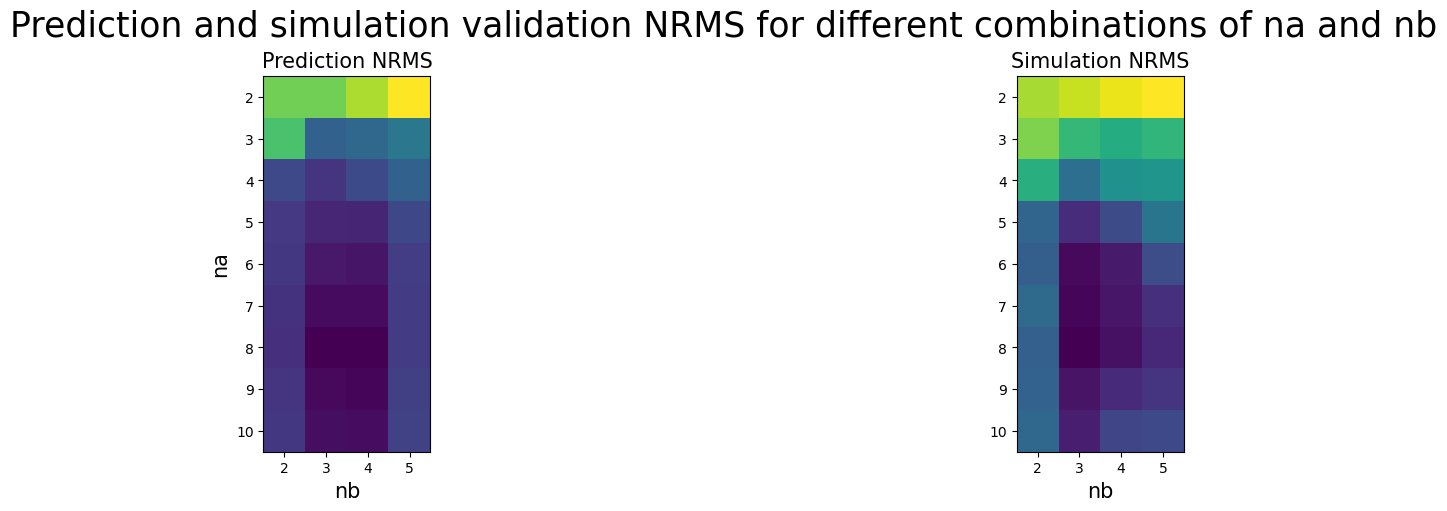

In [6]:
best_na_nb_val_pred, best_na_nb_val_sim = plot_NRMS_Pred_vs_Sim(val_pred_NRMSs, val_sim_NRMSs, na_list, nb_list)

# Test data

Best parameters by prediction NRMS: na= 7, nb= 3
Best parameters by simulation NRMS: na= 7, nb= 3


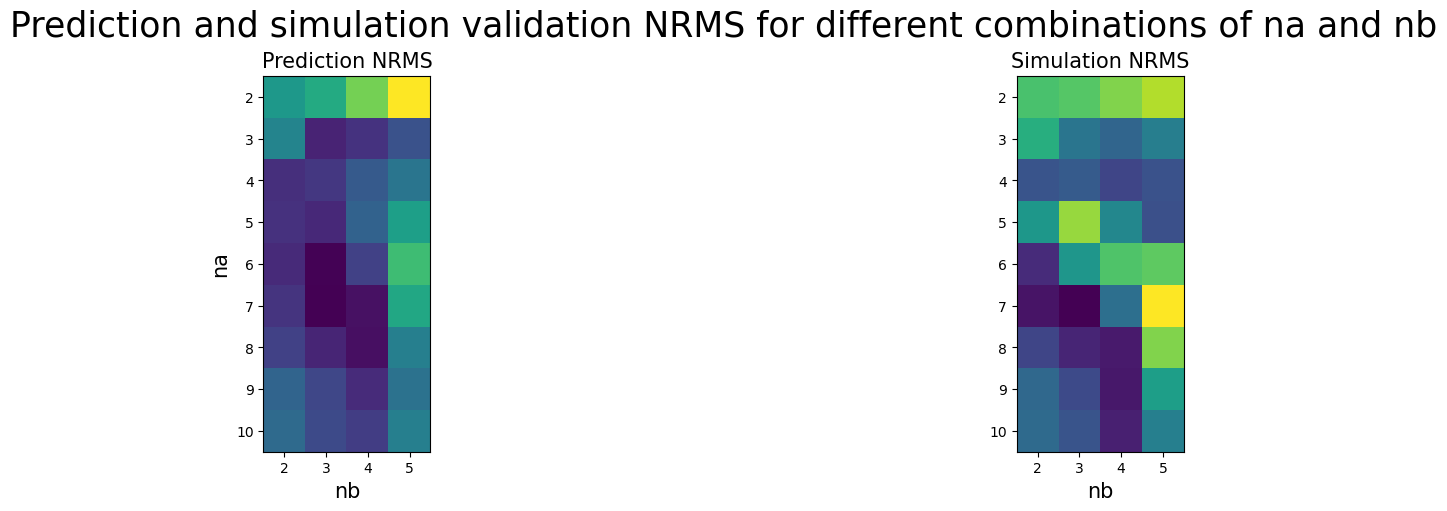

In [7]:
best_na_nb_test_pred, best_na_nb_test_sim = plot_NRMS_Pred_vs_Sim(test_pred_NRMSs, test_sim_NRMSs, na_list, nb_list)

In [8]:
print(f"Best test prediction NRMS found: {test_pred_NRMSs.min()}")
print(f"Best test simulation NRMS found: {test_sim_NRMSs.min()}")

Best test prediction NRMS found: 0.7697113200032262
Best test simulation NRMS found: 8.925197997928631


# Run best na and nb again on larger dataset

In [23]:
n_a, n_b = best_na_nb_val_pred
Split = [0.6, 0.2, 0.2] # split; [training, validation, test]
total_number_of_points = 5000 # total number of points to consider from the larger dataset (starting from index 0)
restart = 5

Xtrain_NARX, Ytrain_NARX = load_narx_data(n_a, n_b, total_number_of_points, section="train", split=Split, as_tensor=False)
Xval_NARX, Yval_NARX = load_narx_data(n_a, n_b, total_number_of_points, section="validation", split=Split, as_tensor=False)
Xtest_NARX, Ytest_NARX = load_narx_data(n_a, n_b, total_number_of_points, section="test", split=Split, as_tensor=False)

Using 3000 datapoints for training set


In [24]:
XtrainNARXSparse = csr_matrix(Xtrain_NARX).toarray()
YtrainNARXSparse = csr_matrix(Ytrain_NARX).toarray().transpose()

In [25]:
kernel = RBF(length_scale_bounds=[1,50]) + WhiteKernel(noise_level_bounds=[1e-6,1e-2])

reg = GaussianProcessRegressor(kernel, n_restarts_optimizer=restart)

reg.fit(XtrainNARXSparse, YtrainNARXSparse)

print(reg.kernel_)

RBF(length_scale=6.4) + WhiteKernel(noise_level=1.16e-05)


In [26]:
Ytrain_pred, Ytrain_pred_std = reg.predict(Xtrain_NARX,return_std=True)
NRMS_train_pred = calculate_error_nrms(Ytrain_pred, Ytrain_NARX)
print(f'Train prediction NRMS: {NRMS_train_pred:.2f} %')

Yval_pred, Yval_pred_std = reg.predict(Xval_NARX,return_std=True)
NRMS_val_pred = calculate_error_nrms(Yval_pred, Yval_NARX)
print(f'Validation prediction NRMS: {NRMS_val_pred:.2f} %')

Ytest_pred, Ytest_pred_std = reg.predict(Xtest_NARX,return_std=True)
NRMS_test_pred = calculate_error_nrms(Ytest_pred, Ytest_NARX)
print(f'Test prediction NRMS: {NRMS_test_pred:.2f} %')

Train prediction NRMS: 0.73 %
Validation prediction NRMS: 0.69 %
Test prediction NRMS: 0.77 %


### Run simulation

In [27]:
Xtrain,Ytrain = load_data(section="train", split=Split, total_number_of_points=total_number_of_points, as_tensor=False)
Xval,Yval = load_data(section="validation", split=Split, total_number_of_points=total_number_of_points, as_tensor=False)
Xtest,Ytest = load_data(section="test", split=Split, total_number_of_points=total_number_of_points, as_tensor=False)

Using 3000 datapoints for training set


In [28]:
sim_model = lambda u,y: reg.predict(np.concatenate([u,y])[None,:])[0] 

In [29]:
Ytrain_sim = use_NARX_model_in_simulation(Xtrain, sim_model, n_a, n_b)

Train simulation NRMS: 5.47 %


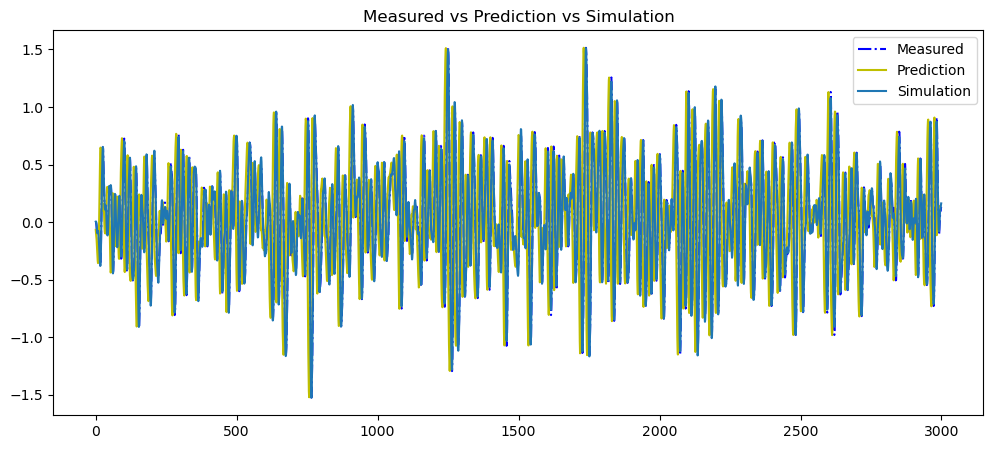

Train prediction NRMS: 0.73 %
Train simulation NRMS: 5.47 %


In [30]:
NRMS_train_sim = calculate_error_nrms(Ytrain_sim, Ytrain)
print(f'Train simulation NRMS: {NRMS_train_sim:.2f} %')

plt.figure(figsize=(12,5))
plt.plot(Ytrain,'b-.')
plt.plot(Ytrain_pred, 'y')
plt.plot(Ytrain_sim)
plt.title("Measured vs Prediction vs Simulation")
plt.legend(['Measured','Prediction','Simulation'])
plt.show()

print(f'Train prediction NRMS: {NRMS_train_pred:.2f} %')
print(f'Train simulation NRMS: {NRMS_train_sim:.2f} %')

In [31]:
Yval_sim = use_NARX_model_in_simulation(Xval, sim_model, n_a, n_b)

Validation simulation NRMS: 6.33 %


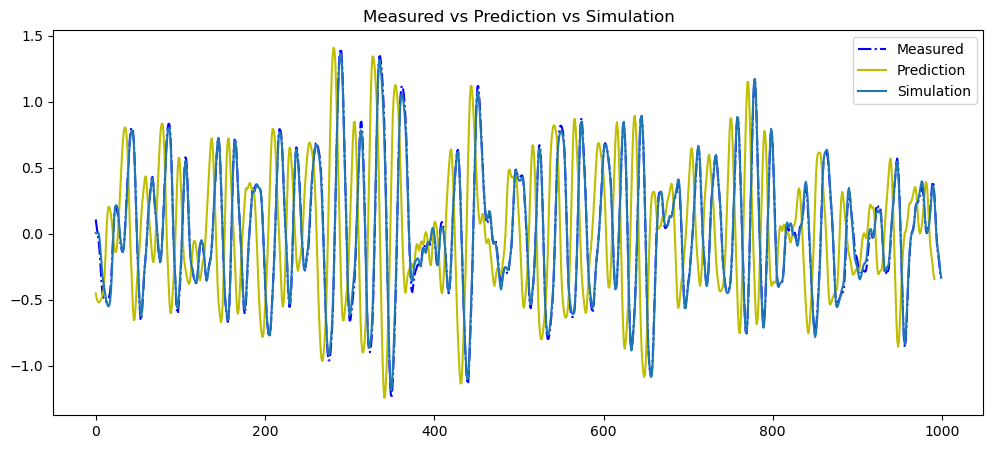

Validation prediction NRMS: 0.69 %
Validation simulation NRMS: 6.33 %


In [32]:
NRMS_val_sim = calculate_error_nrms(Yval_sim, Yval)
print(f'Validation simulation NRMS: {NRMS_val_sim:.2f} %')

plt.figure(figsize=(12,5))
plt.plot(Yval,'b-.')
plt.plot(Yval_pred, 'y')
plt.plot(Yval_sim)
plt.title("Measured vs Prediction vs Simulation")
plt.legend(['Measured','Prediction','Simulation'])
plt.show()

print(f'Validation prediction NRMS: {NRMS_val_pred:.2f} %')
print(f'Validation simulation NRMS: {NRMS_val_sim:.2f} %')

In [33]:
Ytest_sim = use_NARX_model_in_simulation(Xtest, sim_model, n_a, n_b)

Test simulation NRMS: 9.48 %


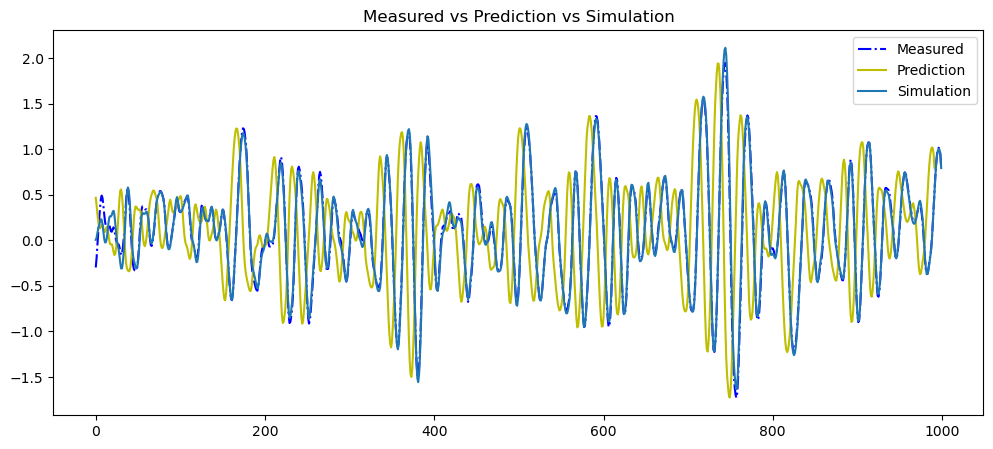

Test prediction NRMS: 0.77 %
Test simulation NRMS: 9.48 %


In [34]:
NRMS_test_sim = calculate_error_nrms(Ytest_sim, Ytest)
print(f'Test simulation NRMS: {NRMS_test_sim:.2f} %')

plt.figure(figsize=(12,5))
plt.plot(Ytest,'b-.')
plt.plot(Ytest_pred, 'y')
plt.plot(Ytest_sim)
plt.title("Measured vs Prediction vs Simulation")
plt.legend(['Measured','Prediction','Simulation'])
plt.show()

print(f'Test prediction NRMS: {NRMS_test_pred:.2f} %')
print(f'Test simulation NRMS: {NRMS_test_sim:.2f} %')

## Final results

In [35]:
data = {
    'Prediction': [NRMS_train_pred, NRMS_val_pred, NRMS_test_pred],
    'Simulation': [NRMS_train_sim, NRMS_val_sim, NRMS_test_sim]
}
    
index = ['Train', 'Validation', 'Test']

df = pd.DataFrame(data, index=index)

df = df.round(2)

display(df)


,Prediction,Simulation
Train,0.73,5.47
Validation,0.69,6.33
Test,0.77,9.48


In [36]:
data = {
    'Prediction': [NRMS_train_pred, NRMS_val_pred, NRMS_test_pred],
    'Simulation': [NRMS_train_sim, NRMS_val_sim, NRMS_test_sim]
}
    
index = ['Train', 'Validation', 'Test']

df = pd.DataFrame(data, index=index)

df = df.round(2)

display(df)

dfs = [df, df, df]

df_combined = pd.concat(
    [df.rename(columns=lambda x: x.zfill(4)) for df in dfs],
    keys=['HEADER TITLE{}'.format(i) for i in range(1, len(dfs) + 1)],
    axis=1
)

df_combined

,Prediction,Simulation
Train,0.73,5.47
Validation,0.69,6.33
Test,0.77,9.48


HEADER TITLE1            HEADER TITLE2            HEADER TITLE3  \
              Prediction Simulation    Prediction Simulation    Prediction   
Train               0.73       5.47          0.73       5.47          0.73   
Validation          0.69       6.33          0.69       6.33          0.69   
Test                0.77       9.48          0.77       9.48          0.77   

                       
           Simulation  
Train            5.47  
Validation       6.33  
Test             9.48